Model Accuracy: 1.00
Number of support vectors: 10
Support vectors:
[[-0.74104992 -0.17106644]
 [ 0.02030274  0.88057152]
 [-1.50240258 -1.64335959]
 [-0.89332045 -0.17106644]
 [-0.13196779  0.67024393]
 [ 0.7816554   0.67024393]
 [ 0.17257327 -0.17106644]
 [-0.89332045 -1.43303199]
 [-0.43650886 -0.80204922]
 [-0.13196779 -0.17106644]]


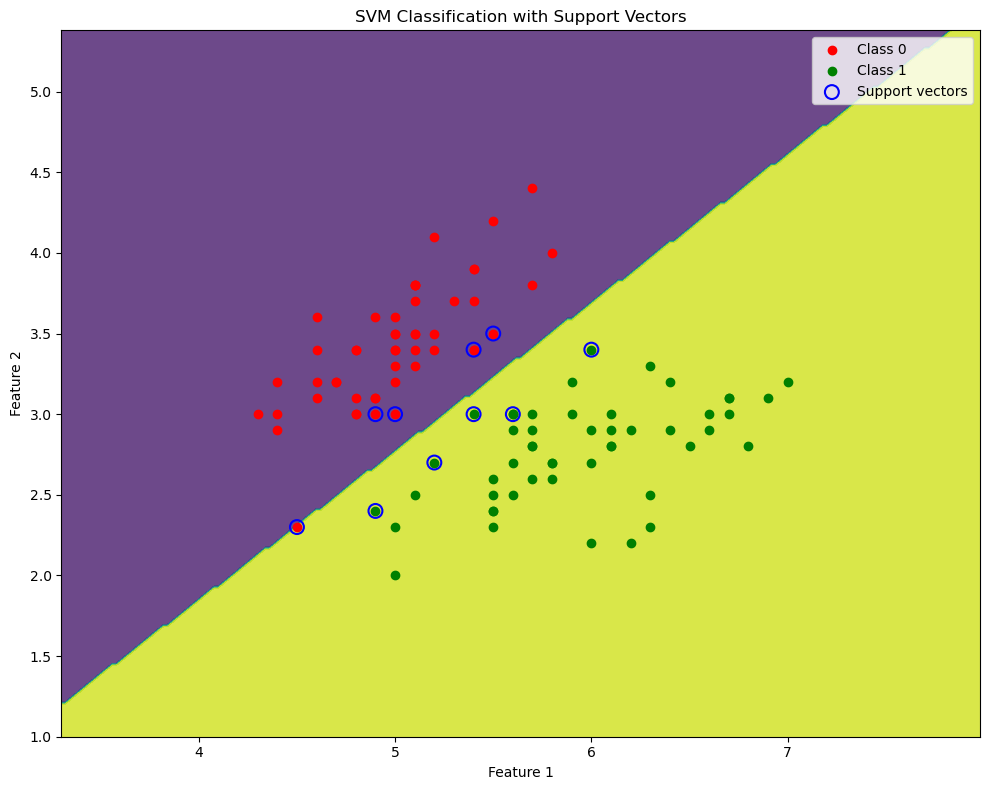

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


X = X[y != 2]
y = y[y != 2]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)


y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


support_vectors = svm_model.support_vectors_
print(f"Number of support vectors: {len(support_vectors)}")
print("Support vectors:")
print(support_vectors)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)
Z = svm_model.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)


plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Class 1')


original_support_vectors = scaler.inverse_transform(support_vectors)
plt.scatter(original_support_vectors[:, 0], original_support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='blue', linewidth=1.5, label='Support vectors')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Support Vectors')
plt.legend()
plt.tight_layout()
plt.show()
 